# Adjusted Carbon Offset by Landmass  
This plot shows the potential adjusted carbon offset by state landmass. It uses adjusted data from Google's Project Sunroof and information provided by the 2010 census (via Wikipedia). States with a higher landmass have more space for buildings for Project Sunroof to utilize. That doesn't mean the states with high landmass actually have more buildings, just that they have the potential for more buildings. It makes sense explore this information to look for patterns, and search for good places to implement Project Sunroof to prove or disprove it's viability nationwide. 

In [1]:
#Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Import adjusted carbon offset data from CSV.
adjusted_carbon_offset_working_df = pd.read_csv('../Resources/OtherData/adjusted_carbon_offset.csv')
adjusted_carbon_offset_df = adjusted_carbon_offset_working_df.reindex(columns = ['state', 'adjusted_carbon_offset_metric_tons'])
adjusted_carbon_offset_df.head()

,state,adjusted_carbon_offset_metric_tons
0,Alabama,1.055440e+07
1,Alaska,3.199207e+05
2,Arizona,1.513840e+07
3,Arkansas,5.142536e+06
4,California,3.589850e+07


In [3]:
#import State Landmass data into pandas from CSV.
state_landmass_working_df = pd.read_csv('../Resources/OtherData/state-surface-area.csv')
state_landmass_df = state_landmass_working_df.reindex(columns= ['state', 'abbrv', 'sq mi'])
state_landmass_df.head()

,state,abbrv,sq mi
0,Alabama,AL,50645.33
1,Alaska,AK,570640.95
2,Arizona,AZ,113594.08
3,Arkansas,AR,52035.48
4,California,CA,155779.22


In [4]:
#join the dataframes to calculate needed information.
carbon_offset_by_land_df = adjusted_carbon_offset_df.join(state_landmass_df.set_index('state'), on = 'state')
carbon_offset_by_land_df = carbon_offset_by_land_df.rename(columns= {'adjusted_carbon_offset_metric_tons':'carbon_offset', 'sq mi': 'surface_area'})
carbon_offset_by_land_df = carbon_offset_by_land_df.reindex(columns = ['state', 'abbrv', 'surface_area', 'carbon_offset'])
carbon_offset_by_land_df.head()

,state,abbrv,surface_area,carbon_offset
0,Alabama,AL,50645.33,1.055440e+07
1,Alaska,AK,570640.95,3.199207e+05
2,Arizona,AZ,113594.08,1.513840e+07
3,Arkansas,AR,52035.48,5.142536e+06
4,California,CA,155779.22,3.589850e+07


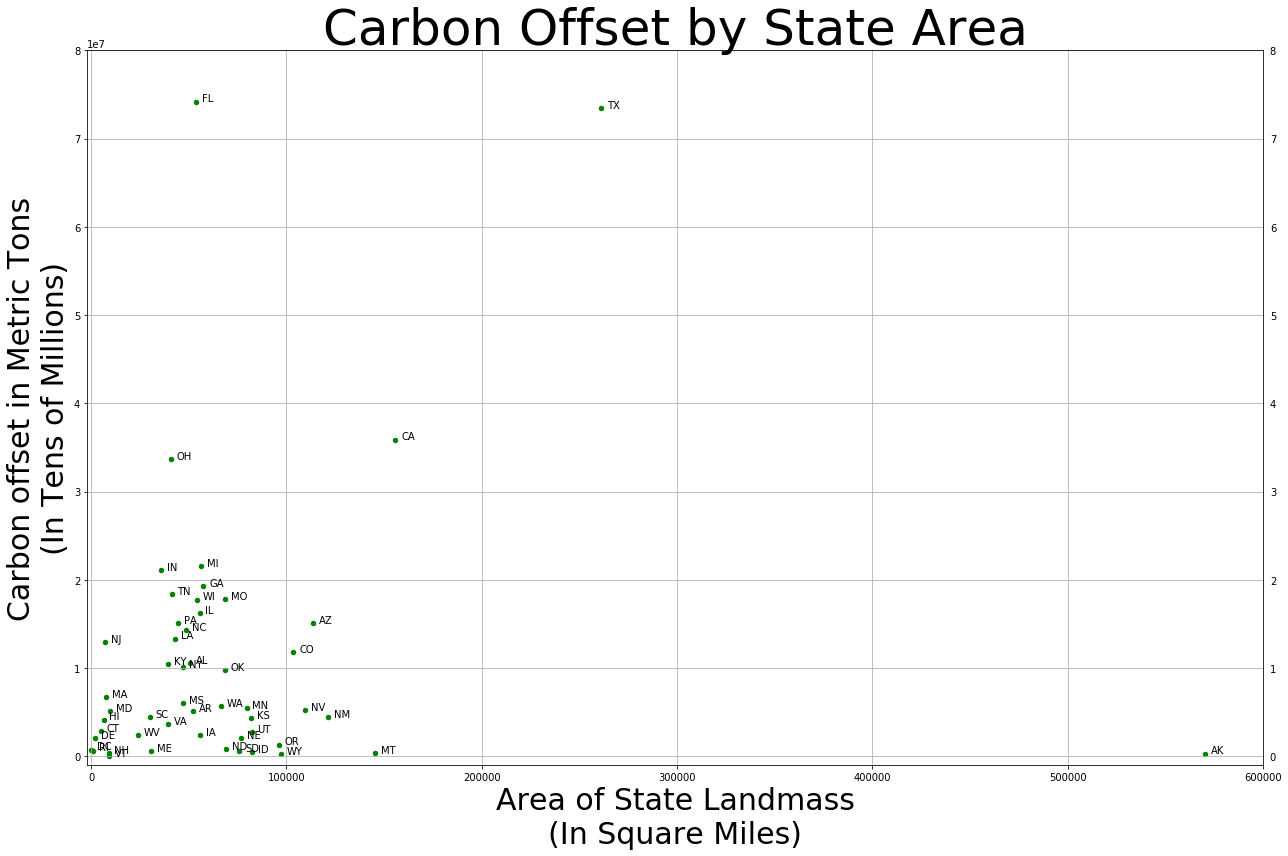

In [16]:
#Scatter Plot of Adjusted Carbon Offset by Landmass, and save as a png file.

#plot the data
carbon_offset_by_land_df.plot.scatter(x='surface_area', y='carbon_offset', figsize = (18,12), color= 'green')

#titles
plt.title('Carbon Offset by State Area', fontsize = 50)
plt.xlabel('Area of State Landmass'
          '\n'
          '(In Square Miles)', Fontsize= 30)
plt.ylabel('Carbon offset in Metric Tons'
          '\n'
          '(In Tens of Millions)', Fontsize= 30)

#Grid & axis values
plt.grid(True)
plt.ylim(-1000000, 80000000)
plt.xlim(-2000, 600000)
plt.tick_params(labelright=True)


#Annotation of Dots
xaxis = np.array(carbon_offset_by_land_df['surface_area'])
yaxis = np.array(carbon_offset_by_land_df['carbon_offset'])
variable_label = np.array(carbon_offset_by_land_df.abbrv)
for i, txt in enumerate(variable_label):
    plt.annotate(txt, (xaxis[i]+3000, yaxis[i]+1000))

#Save figure
plt.tight_layout()
#plt.savefig('../Images/Carbon_Offset_by_State_Area.png')

# Analysis  
There is a large cluster of dots in the lower lefthand corner of the scatter plot. This area is hard to read because of the outliers on the x & y axes. The next plot shows the data without the outliers AK, FL, TX, for sure, but maybe OH and CA too. Calculations below to find out.

In [6]:
# Find Outliers

#y-axis
print('carbon offset')
y_mean = carbon_offset_by_land_df['carbon_offset'].mean()
print('mean = ' + str(y_mean))
y_std = carbon_offset_by_land_df['carbon_offset'].std()
print('std = ' + str(y_std))

#x-axis
print('suface area')
x_mean = carbon_offset_by_land_df['surface_area'].mean()
print('mean = ' + str(x_mean))
x_std = carbon_offset_by_land_df['surface_area'].std()
print('std = ' + str(x_std))

carbon offset
mean = 10874481.588083204
std = 15315803.622914335
suface area
mean = 69253.04784313725
std = 85526.07602263169


In [7]:
#Find z-scores
carbon_offset_by_land_df['z_carbon_offset'] = (carbon_offset_by_land_df['carbon_offset']-y_mean)/y_std
carbon_offset_by_land_df['z_surface_area']= (carbon_offset_by_land_df['surface_area']-x_mean)/x_std
carbon_offset_by_land_df = carbon_offset_by_land_df.reindex(columns = ['state', 'abbrv', 'surface_area', 'z_surface_area', 
                                                                       'carbon_offset', 'z_carbon_offset'])
#carbon_offset_by_land_df.head()

Means and Standard Deviations are not resistant to outliers. After the calculation of z-scores two groups were noticed. Z-scores less than one were a vast majority, and z-scores of 4+. So every value with a z-score greater than 1 was dropped form the dataframe. The dropped states are still important, and their numbers are real, but it's fair to say those states will require unique solutions.

In [8]:
#Remove outliers from datafrome.
#New Dataframe
trimmed_carbon_offset_by_land_df = carbon_offset_by_land_df

#Remove x-axis outliers
trimmed_carbon_offset_by_land_df = trimmed_carbon_offset_by_land_df.drop(
trimmed_carbon_offset_by_land_df[trimmed_carbon_offset_by_land_df.z_surface_area > 1].index)

#remove y-axis outliers
trimmed_carbon_offset_by_land_df = trimmed_carbon_offset_by_land_df.drop(
trimmed_carbon_offset_by_land_df[trimmed_carbon_offset_by_land_df.z_carbon_offset > 1].index)

#reset the index
trimmed_carbon_offset_by_land_df = trimmed_carbon_offset_by_land_df.reset_index()

#verify everything worked.
print(trimmed_carbon_offset_by_land_df['z_surface_area'].max())
print(trimmed_carbon_offset_by_land_df['z_carbon_offset'].max())

0.8920408336829851
0.6964909367182777


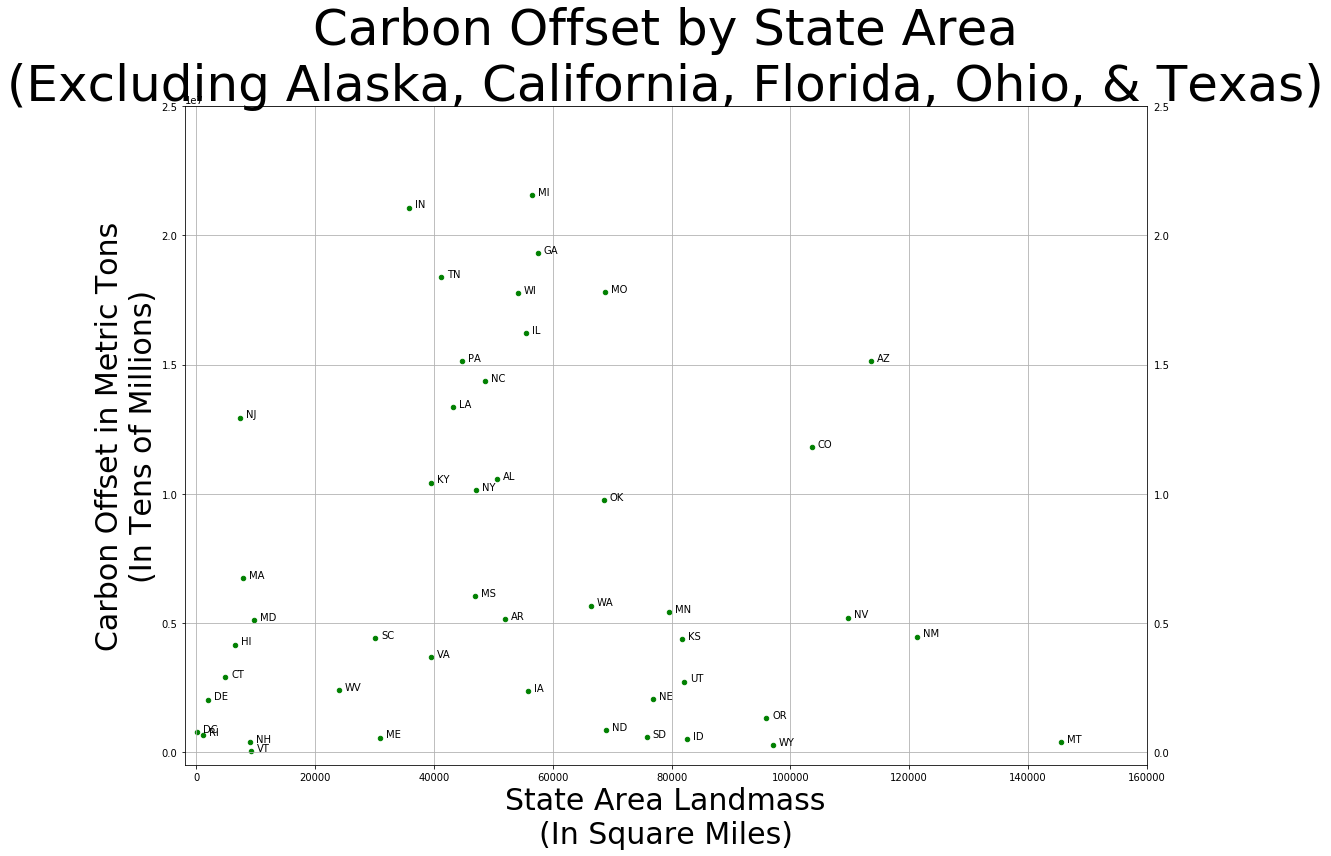

In [19]:
#Scatter plot of adjusted carbon offset by landmass sans outliers and saved to a png file.

#plot the data
trimmed_carbon_offset_by_land_df.plot.scatter(x='surface_area', y='carbon_offset', figsize = (18,12), color= 'green')

#Titles
plt.title("Carbon Offset by State Area"
         "\n"
         "(Excluding Alaska, California, Florida, Ohio, & Texas)", Fontsize = 50)
plt.xlabel("State Area Landmass"
          "\n"
          "(In Square Miles)", Fontsize = 30)
plt.ylabel("Carbon Offset in Metric Tons"
          "\n"
          "(In Tens of Millions)", Fontsize = 30)

#Grid and axes values
plt.grid(True)
plt.xlim(-2000, 160000)
plt.ylim(-500000, 25000000)
plt.tick_params(labelright=True)

#Annotation of Dots
xaxis = np.array(trimmed_carbon_offset_by_land_df['surface_area'])
yaxis = np.array(trimmed_carbon_offset_by_land_df['carbon_offset'])
variable_label = np.array(trimmed_carbon_offset_by_land_df.abbrv)
for i, txt in enumerate(variable_label):
    plt.annotate(txt, (xaxis[i]+1000, yaxis[i]+1000))
    
#Save figure
plt.tight_layout()
plt.savefig('../Images/Carbon_Offset_by_State_Area_sans_Outliers.png')